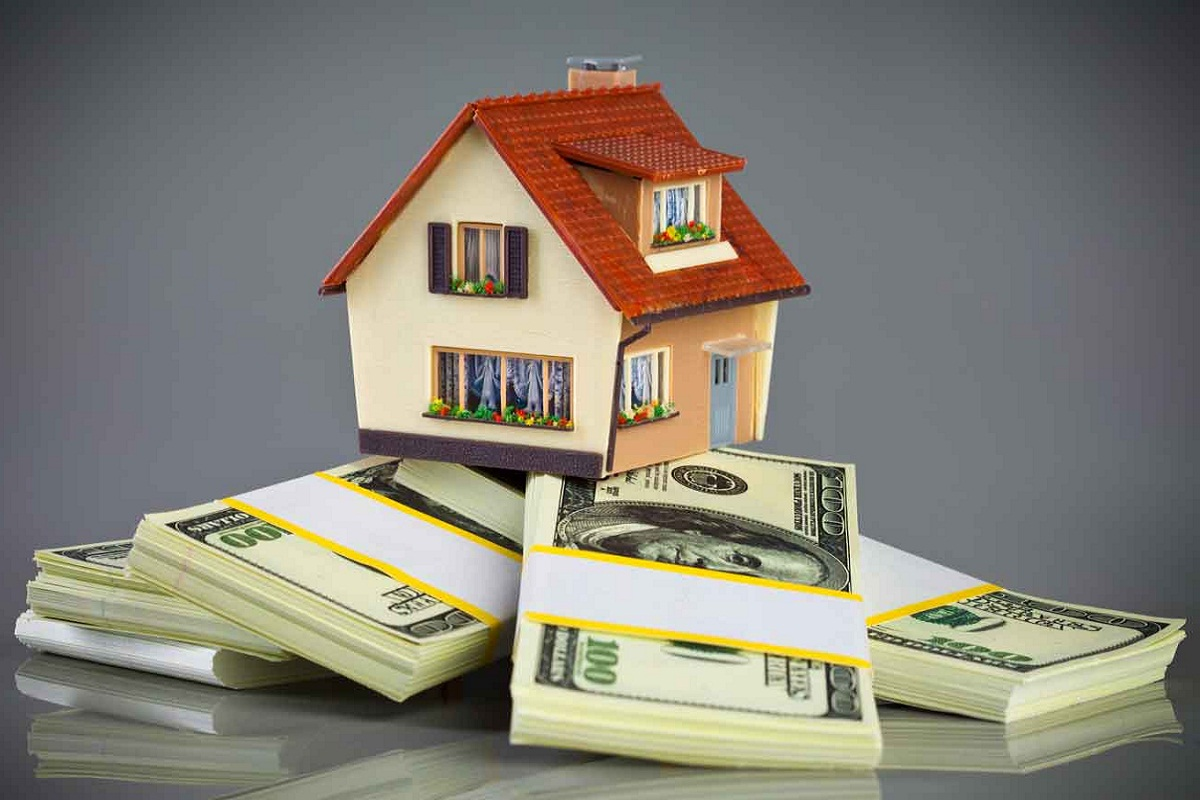

## THE GOAL

* **This notebook shares a study and explaines regression techniques used to predict house prices.**

* **Each feature of the dataset represents a different attribute of each house**
 
* **The goal is to predict the values for SalePrice feature by applying advanced regression models**

## THE METHOD

* **Cross Validation: Using 5-fold cross-validation**

* **11 different advanced regression models were used to predict house prices. Models used include XGBoost, LightGBM, Gradient Boosting, Random Forest**

* **Root Mean Squared Error (RMSE) was used as the metric to evaluate the models success**

## IMPORTING PACKAGES AND DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("husl", 10)


import sklearn
import xgboost
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from scipy.stats import randint, uniform

# Data Preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
# Model Tuning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
corr = train.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.5] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object') 

No. of Highly Corrolated Features: 11


Text(145.72222222222223, 0.5, 'Features')

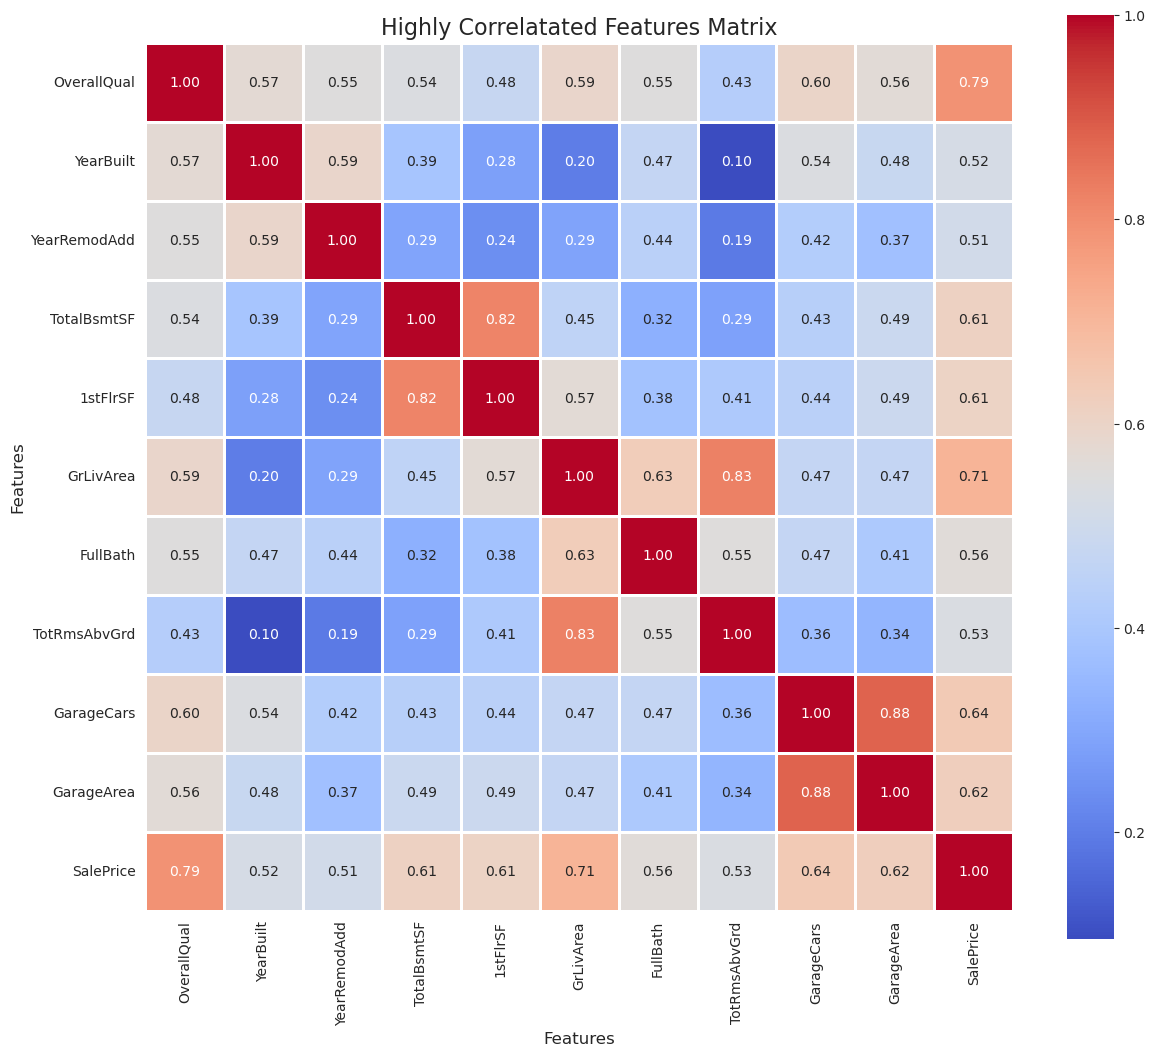

In [7]:
plt.figure(figsize=(14,12))   
sns.heatmap(train[high_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2)

plt.title('Highly Correlatated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

In [8]:
def highly_Corr_features_Plot(col):
    if col!='SalePrice':
        sns.regplot(x = col, y = 'SalePrice', data = train)
        plt.show()

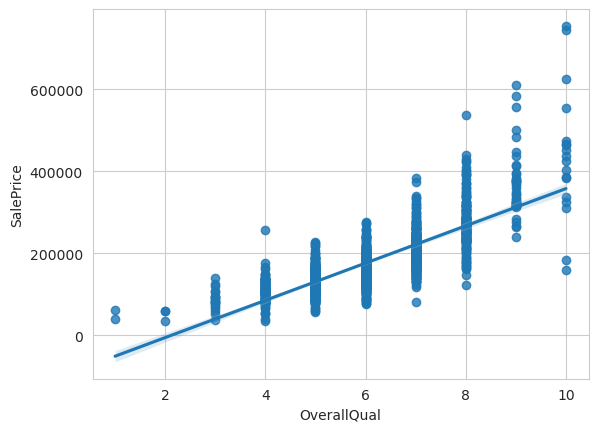

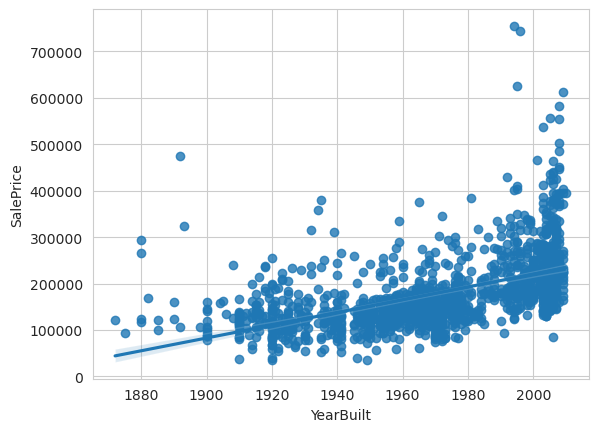

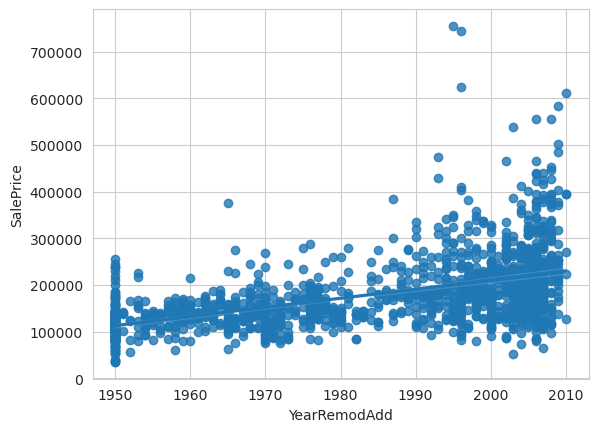

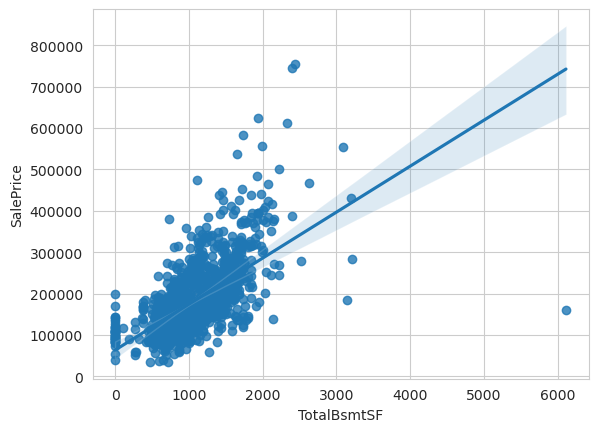

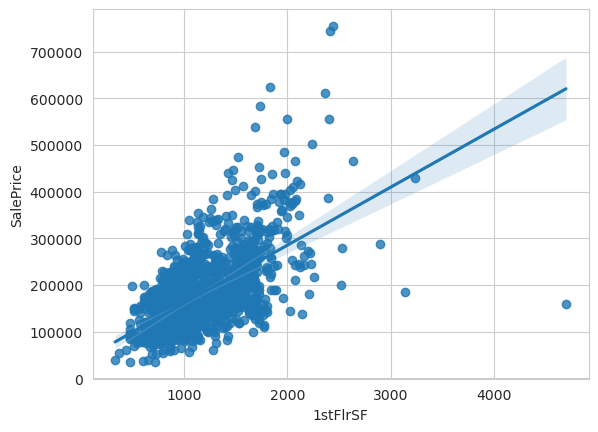

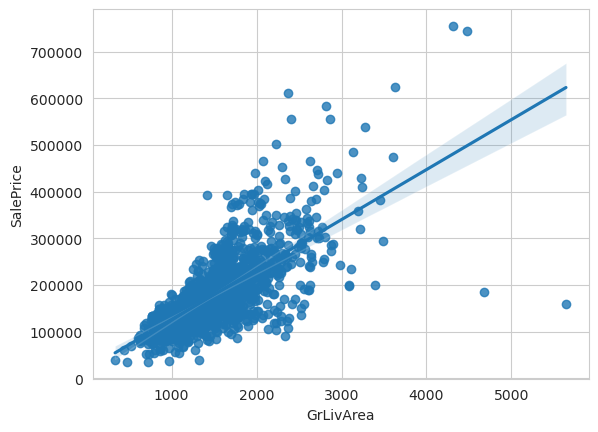

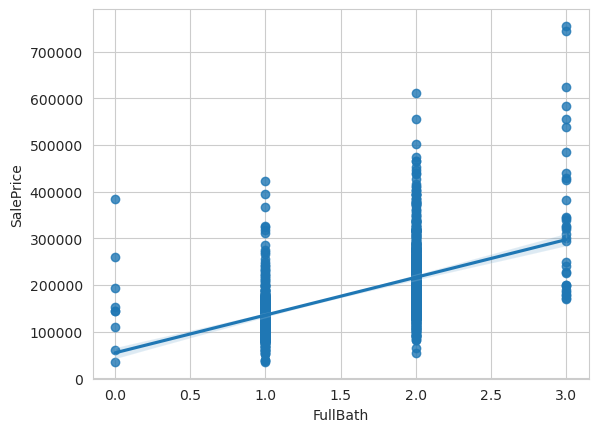

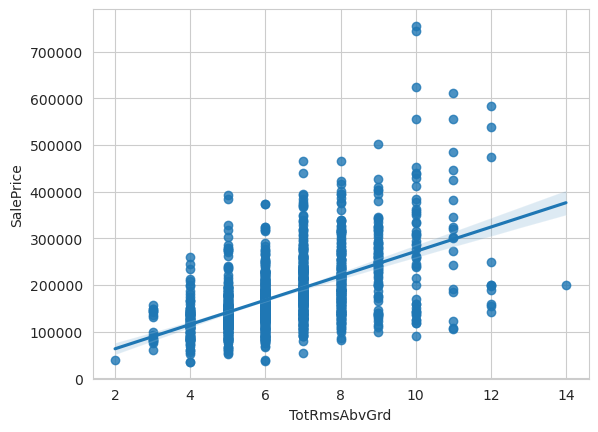

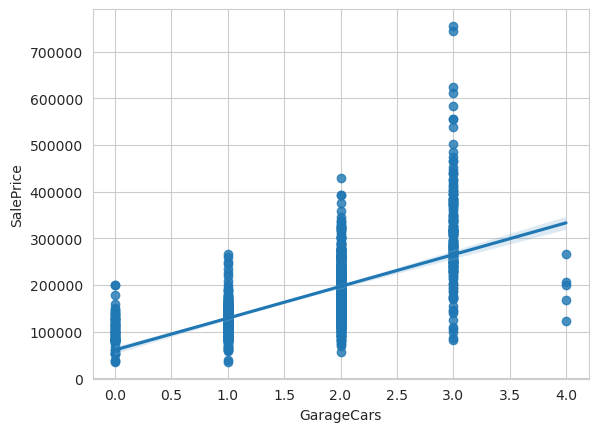

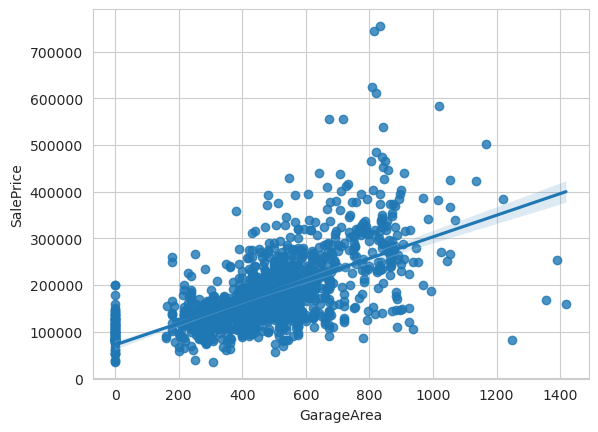

In [9]:
for col in high_corr_features:
    highly_Corr_features_Plot(col)

#### **We can see linear relationship with the features and SalePrice**

In [10]:
categorical_cols = [col for col in train.columns if train[col].dtypes == "O"]

In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("########################################## \n")

    if plot:
        sns.boxplot(x=dataframe[col_name], y=dataframe['SalePrice'], data=dataframe, palette="Set3")
        
        plt.title("{} Box Plot".format(col_name.capitalize()))
        
        plt.show(block=True)

         MSZoning      Ratio
RL           1151  78.835616
RM            218  14.931507
FV             65   4.452055
RH             16   1.095890
C (all)        10   0.684932
########################################## 



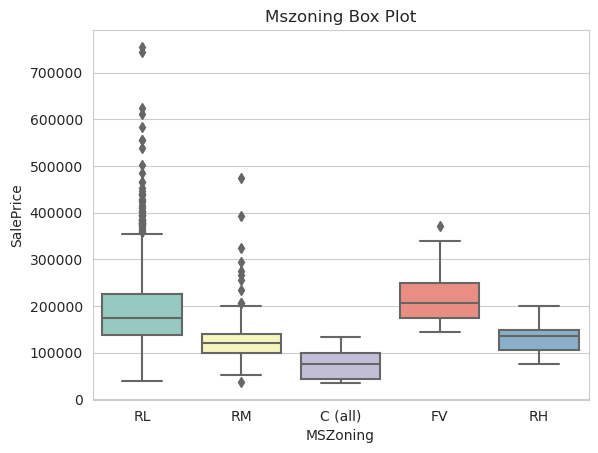

      Street      Ratio
Pave    1454  99.589041
Grvl       6   0.410959
########################################## 



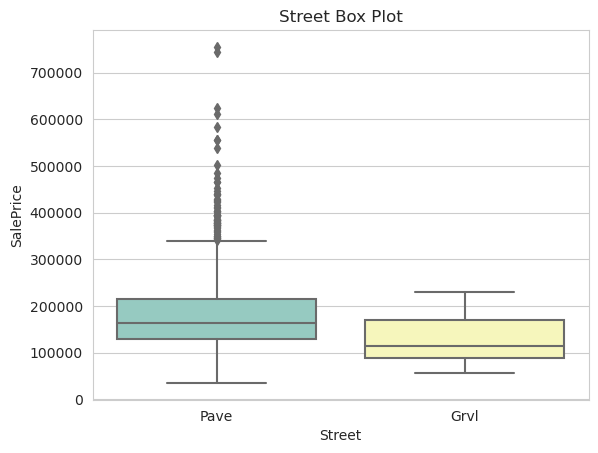

      Alley     Ratio
Grvl     50  3.424658
Pave     41  2.808219
########################################## 



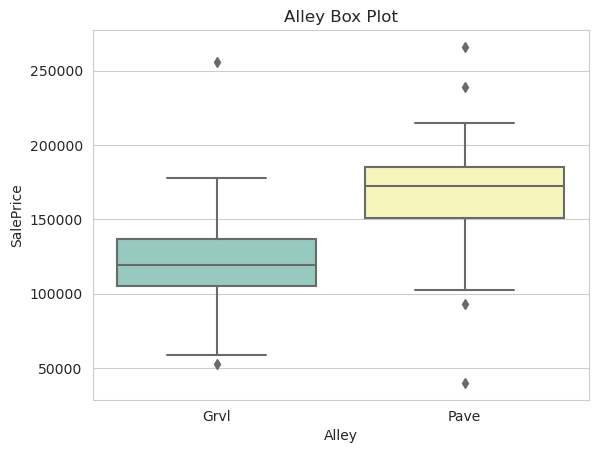

     LotShape      Ratio
Reg       925  63.356164
IR1       484  33.150685
IR2        41   2.808219
IR3        10   0.684932
########################################## 



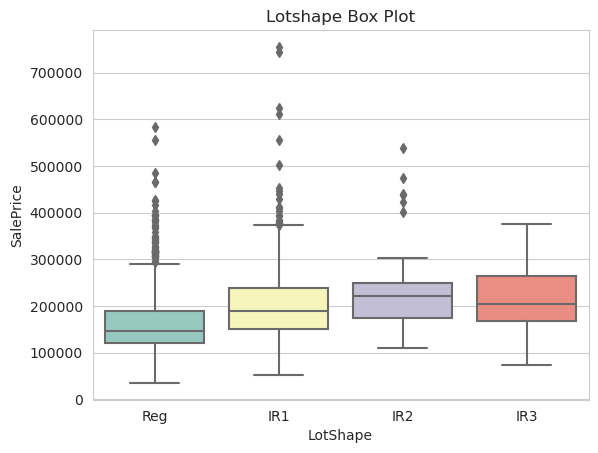

     LandContour      Ratio
Lvl         1311  89.794521
Bnk           63   4.315068
HLS           50   3.424658
Low           36   2.465753
########################################## 



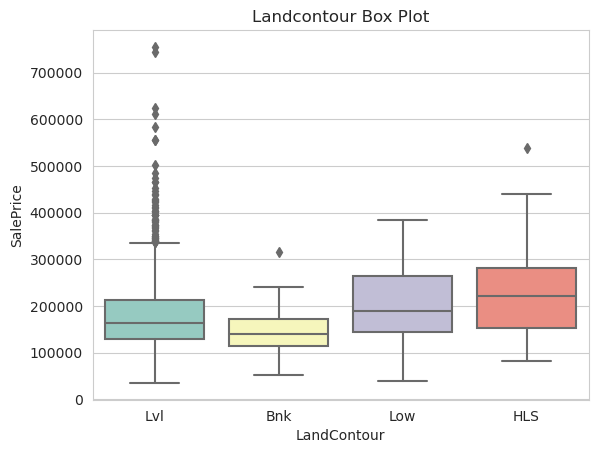

        Utilities      Ratio
AllPub       1459  99.931507
NoSeWa          1   0.068493
########################################## 



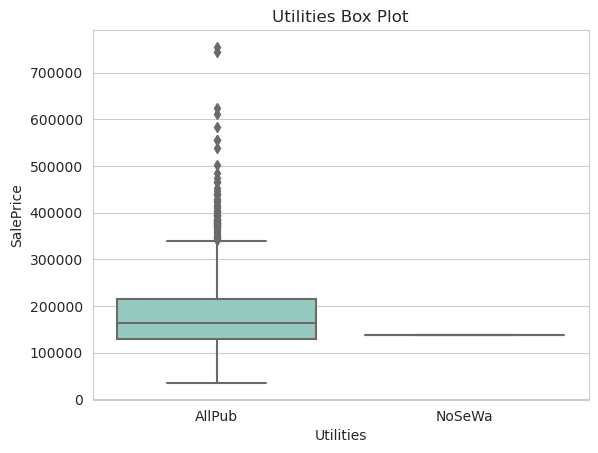

         LotConfig      Ratio
Inside        1052  72.054795
Corner         263  18.013699
CulDSac         94   6.438356
FR2             47   3.219178
FR3              4   0.273973
########################################## 



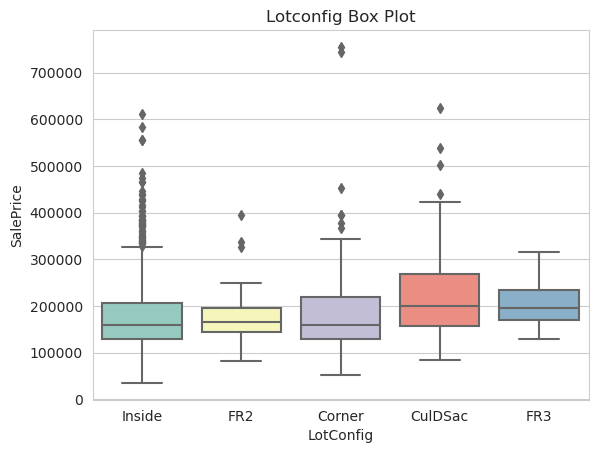

     LandSlope      Ratio
Gtl       1382  94.657534
Mod         65   4.452055
Sev         13   0.890411
########################################## 



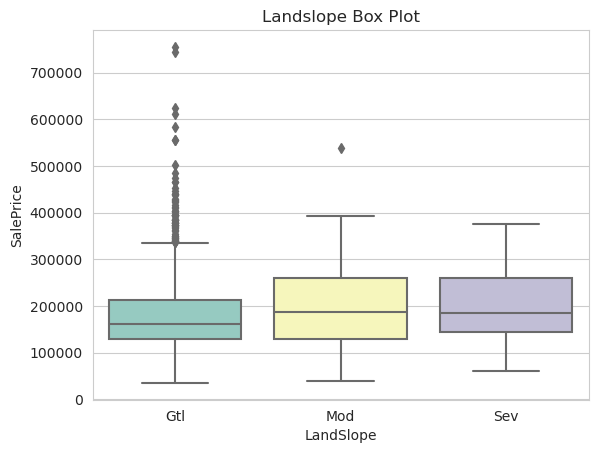

         Neighborhood      Ratio
NAmes             225  15.410959
CollgCr           150  10.273973
OldTown           113   7.739726
Edwards           100   6.849315
Somerst            86   5.890411
Gilbert            79   5.410959
NridgHt            77   5.273973
Sawyer             74   5.068493
NWAmes             73   5.000000
SawyerW            59   4.041096
BrkSide            58   3.972603
Crawfor            51   3.493151
Mitchel            49   3.356164
NoRidge            41   2.808219
Timber             38   2.602740
IDOTRR             37   2.534247
ClearCr            28   1.917808
StoneBr            25   1.712329
SWISU              25   1.712329
MeadowV            17   1.164384
Blmngtn            17   1.164384
BrDale             16   1.095890
Veenker            11   0.753425
NPkVill             9   0.616438
Blueste             2   0.136986
########################################## 



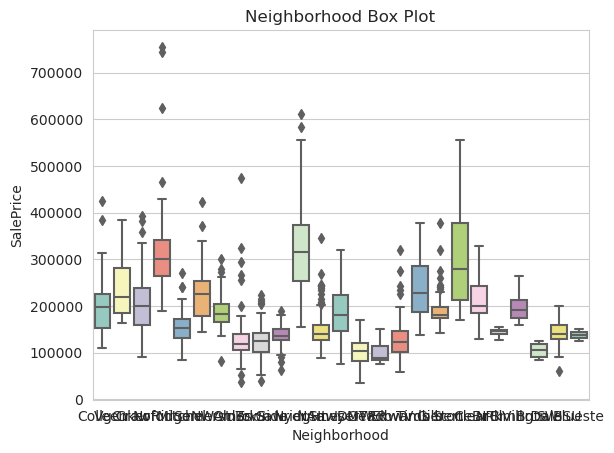

        Condition1      Ratio
Norm          1260  86.301370
Feedr           81   5.547945
Artery          48   3.287671
RRAn            26   1.780822
PosN            19   1.301370
RRAe            11   0.753425
PosA             8   0.547945
RRNn             5   0.342466
RRNe             2   0.136986
########################################## 



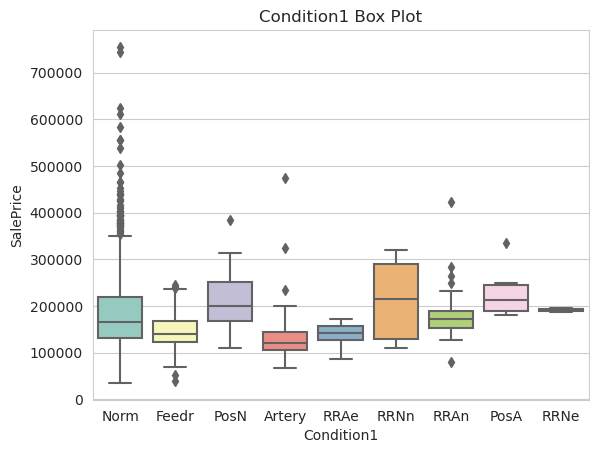

        Condition2      Ratio
Norm          1445  98.972603
Feedr            6   0.410959
Artery           2   0.136986
RRNn             2   0.136986
PosN             2   0.136986
PosA             1   0.068493
RRAn             1   0.068493
RRAe             1   0.068493
########################################## 



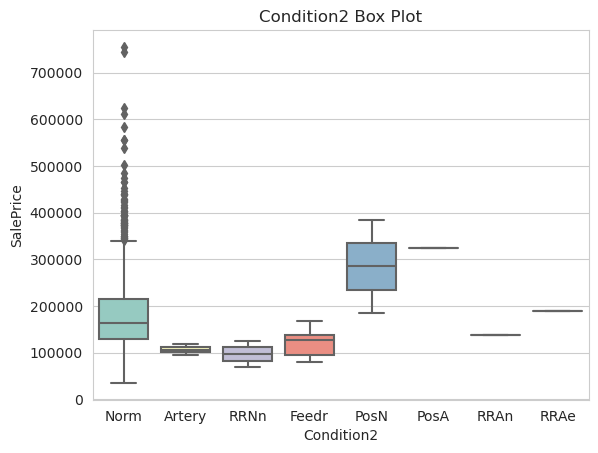

        BldgType      Ratio
1Fam        1220  83.561644
TwnhsE       114   7.808219
Duplex        52   3.561644
Twnhs         43   2.945205
2fmCon        31   2.123288
########################################## 



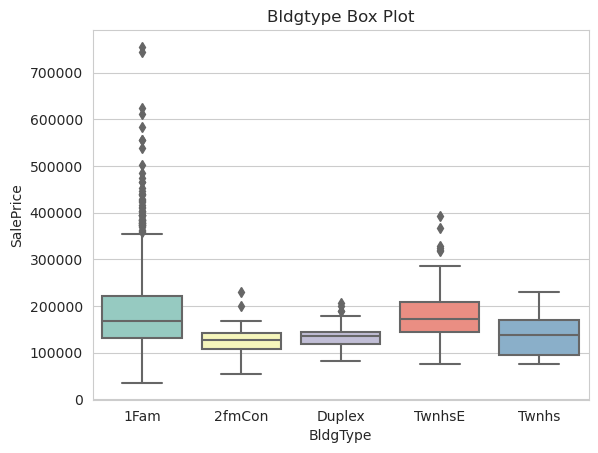

        HouseStyle      Ratio
1Story         726  49.726027
2Story         445  30.479452
1.5Fin         154  10.547945
SLvl            65   4.452055
SFoyer          37   2.534247
1.5Unf          14   0.958904
2.5Unf          11   0.753425
2.5Fin           8   0.547945
########################################## 



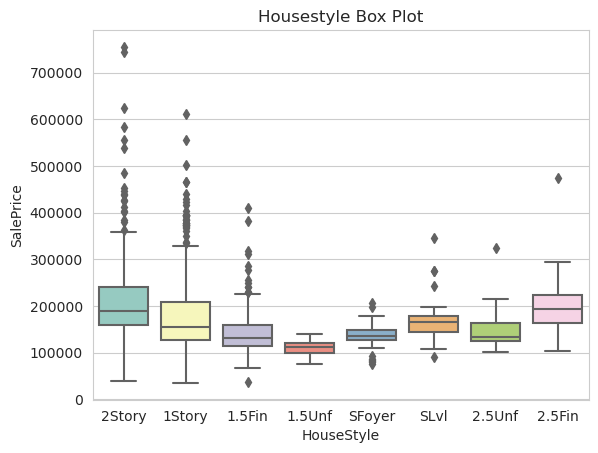

         RoofStyle      Ratio
Gable         1141  78.150685
Hip            286  19.589041
Flat            13   0.890411
Gambrel         11   0.753425
Mansard          7   0.479452
Shed             2   0.136986
########################################## 



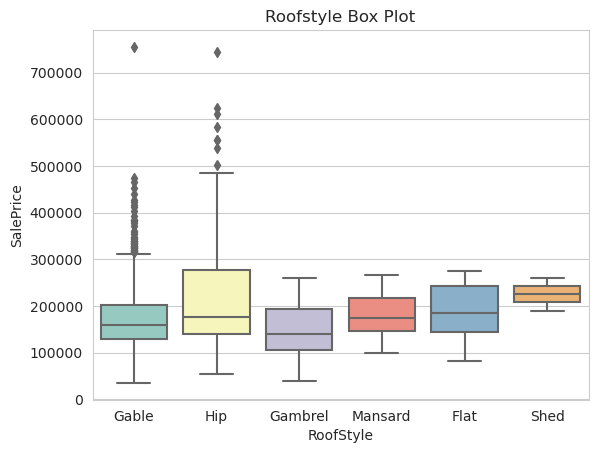

         RoofMatl      Ratio
CompShg      1434  98.219178
Tar&Grv        11   0.753425
WdShngl         6   0.410959
WdShake         5   0.342466
Metal           1   0.068493
Membran         1   0.068493
Roll            1   0.068493
ClyTile         1   0.068493
########################################## 



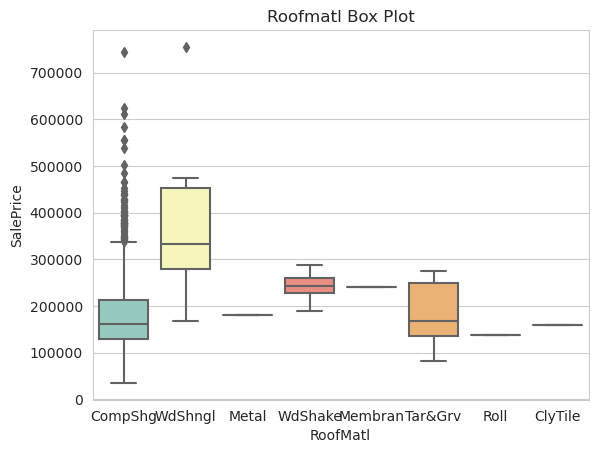

         Exterior1st      Ratio
VinylSd          515  35.273973
HdBoard          222  15.205479
MetalSd          220  15.068493
Wd Sdng          206  14.109589
Plywood          108   7.397260
CemntBd           61   4.178082
BrkFace           50   3.424658
WdShing           26   1.780822
Stucco            25   1.712329
AsbShng           20   1.369863
BrkComm            2   0.136986
Stone              2   0.136986
AsphShn            1   0.068493
ImStucc            1   0.068493
CBlock             1   0.068493
########################################## 



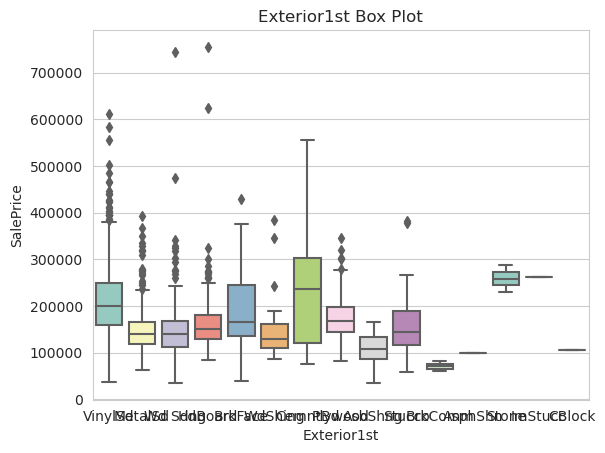

         Exterior2nd      Ratio
VinylSd          504  34.520548
MetalSd          214  14.657534
HdBoard          207  14.178082
Wd Sdng          197  13.493151
Plywood          142   9.726027
CmentBd           60   4.109589
Wd Shng           38   2.602740
Stucco            26   1.780822
BrkFace           25   1.712329
AsbShng           20   1.369863
ImStucc           10   0.684932
Brk Cmn            7   0.479452
Stone              5   0.342466
AsphShn            3   0.205479
Other              1   0.068493
CBlock             1   0.068493
########################################## 



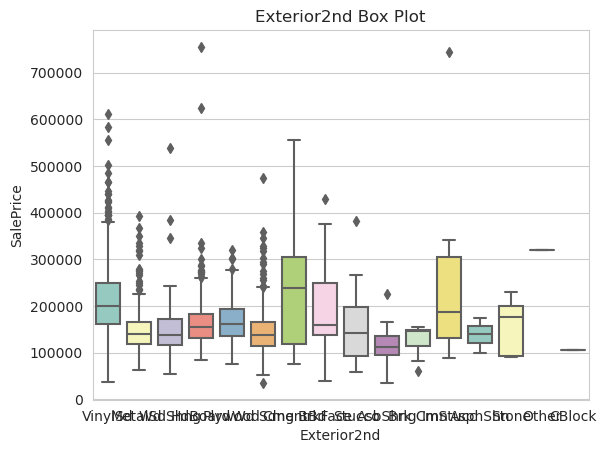

         MasVnrType      Ratio
None            864  59.178082
BrkFace         445  30.479452
Stone           128   8.767123
BrkCmn           15   1.027397
########################################## 



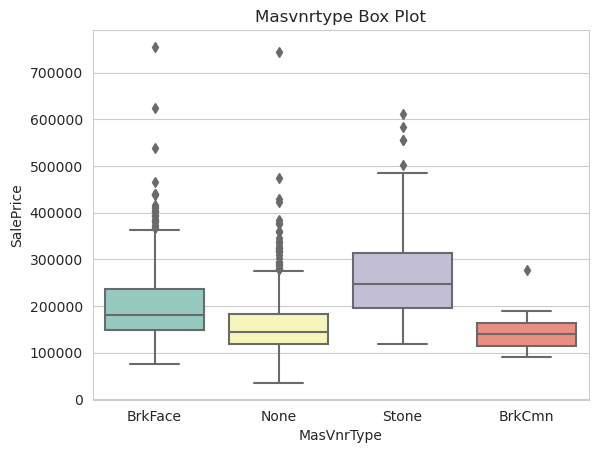

    ExterQual      Ratio
TA        906  62.054795
Gd        488  33.424658
Ex         52   3.561644
Fa         14   0.958904
########################################## 



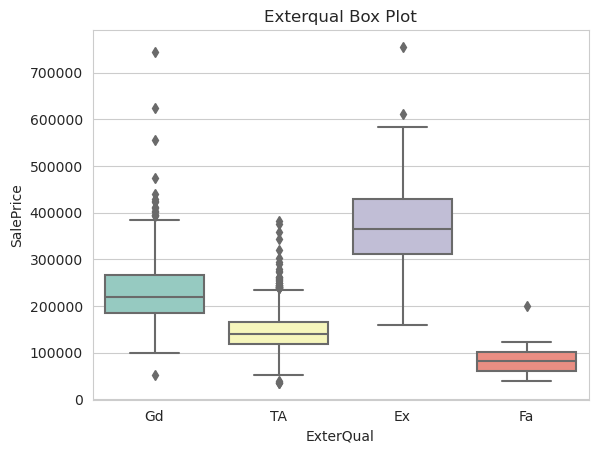

    ExterCond      Ratio
TA       1282  87.808219
Gd        146  10.000000
Fa         28   1.917808
Ex          3   0.205479
Po          1   0.068493
########################################## 



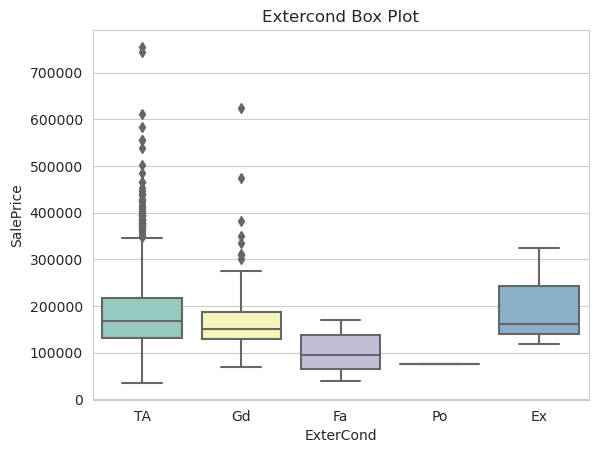

        Foundation      Ratio
PConc          647  44.315068
CBlock         634  43.424658
BrkTil         146  10.000000
Slab            24   1.643836
Stone            6   0.410959
Wood             3   0.205479
########################################## 



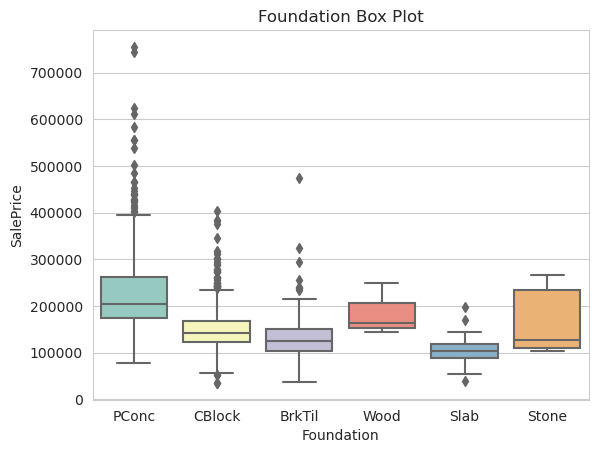

    BsmtQual      Ratio
TA       649  44.452055
Gd       618  42.328767
Ex       121   8.287671
Fa        35   2.397260
########################################## 



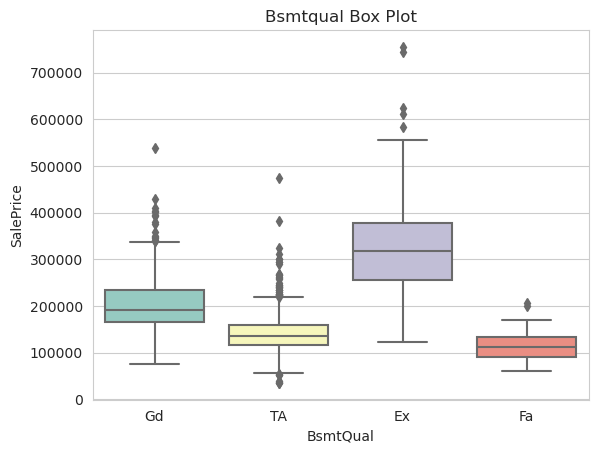

    BsmtCond      Ratio
TA      1311  89.794521
Gd        65   4.452055
Fa        45   3.082192
Po         2   0.136986
########################################## 



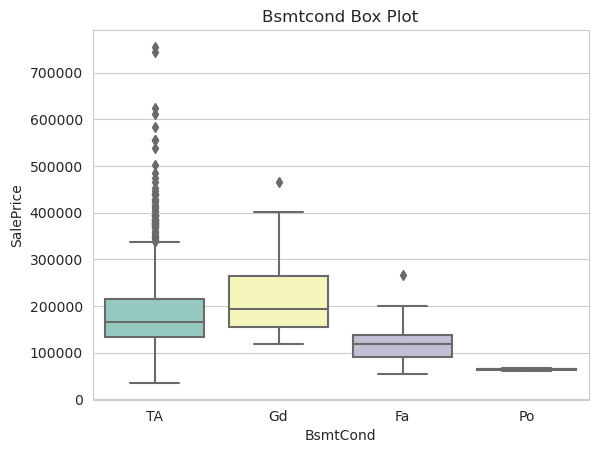

    BsmtExposure      Ratio
No           953  65.273973
Av           221  15.136986
Gd           134   9.178082
Mn           114   7.808219
########################################## 



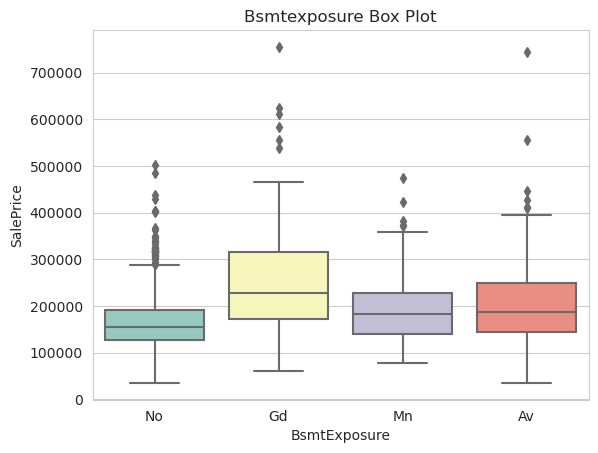

     BsmtFinType1      Ratio
Unf           430  29.452055
GLQ           418  28.630137
ALQ           220  15.068493
BLQ           148  10.136986
Rec           133   9.109589
LwQ            74   5.068493
########################################## 



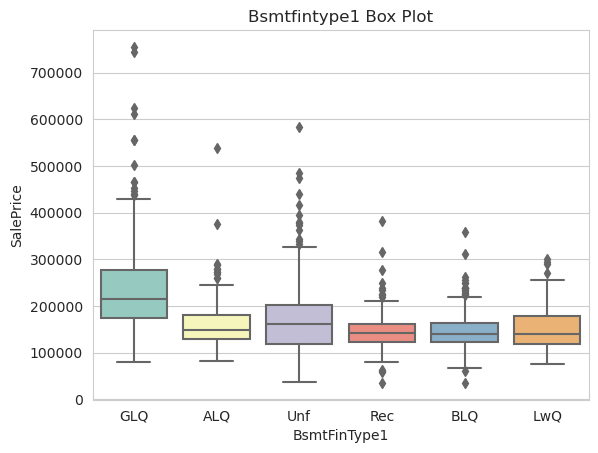

     BsmtFinType2      Ratio
Unf          1256  86.027397
Rec            54   3.698630
LwQ            46   3.150685
BLQ            33   2.260274
ALQ            19   1.301370
GLQ            14   0.958904
########################################## 



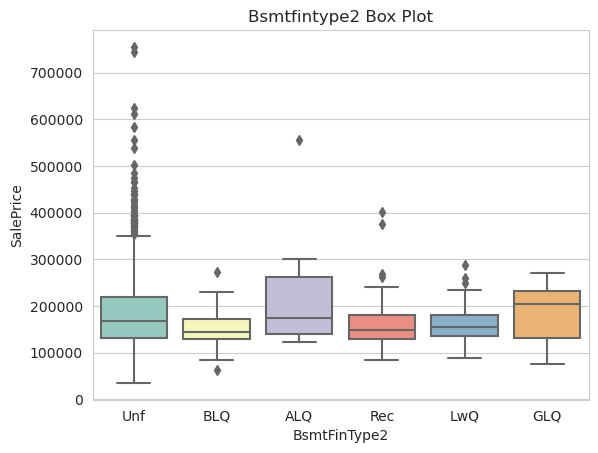

       Heating      Ratio
GasA      1428  97.808219
GasW        18   1.232877
Grav         7   0.479452
Wall         4   0.273973
OthW         2   0.136986
Floor        1   0.068493
########################################## 



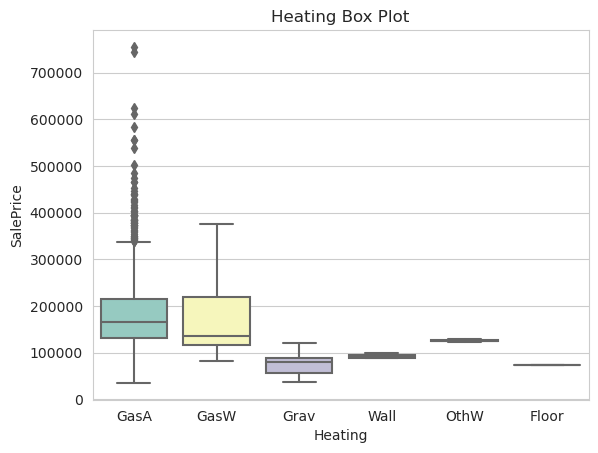

    HeatingQC      Ratio
Ex        741  50.753425
TA        428  29.315068
Gd        241  16.506849
Fa         49   3.356164
Po          1   0.068493
########################################## 



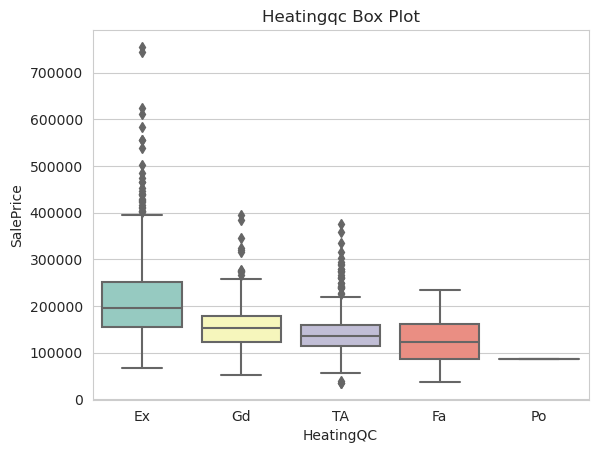

   CentralAir      Ratio
Y        1365  93.493151
N          95   6.506849
########################################## 



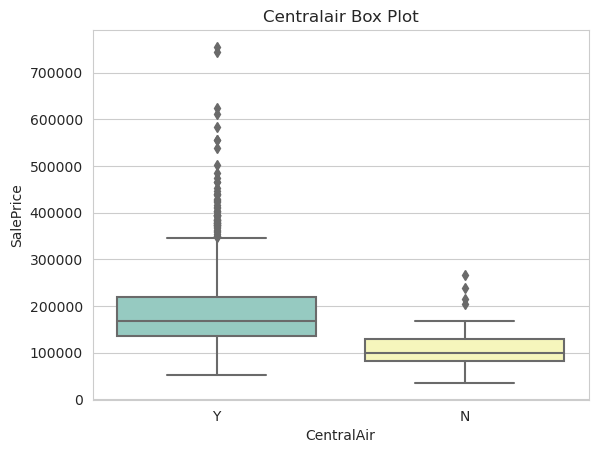

       Electrical      Ratio
SBrkr        1334  91.369863
FuseA          94   6.438356
FuseF          27   1.849315
FuseP           3   0.205479
Mix             1   0.068493
########################################## 



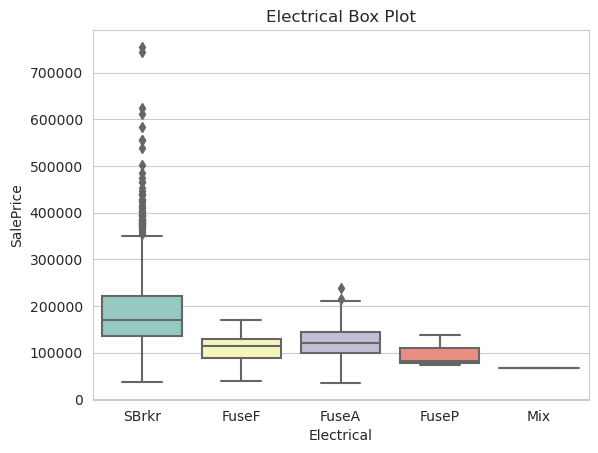

    KitchenQual      Ratio
TA          735  50.342466
Gd          586  40.136986
Ex          100   6.849315
Fa           39   2.671233
########################################## 



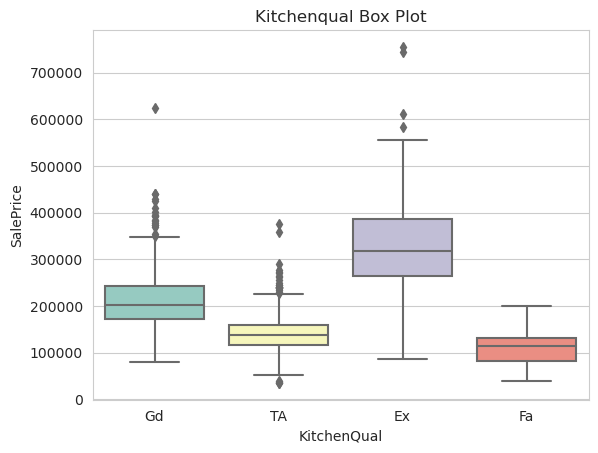

      Functional      Ratio
Typ         1360  93.150685
Min2          34   2.328767
Min1          31   2.123288
Mod           15   1.027397
Maj1          14   0.958904
Maj2           5   0.342466
Sev            1   0.068493
########################################## 



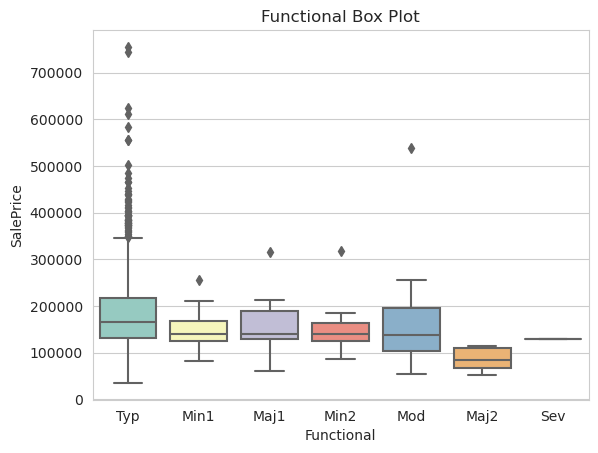

    FireplaceQu      Ratio
Gd          380  26.027397
TA          313  21.438356
Fa           33   2.260274
Ex           24   1.643836
Po           20   1.369863
########################################## 



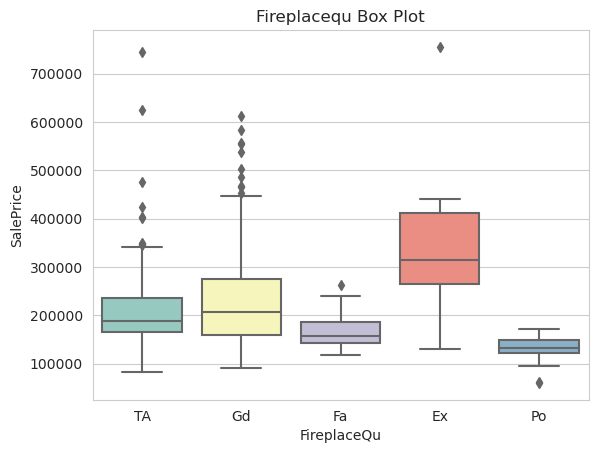

         GarageType      Ratio
Attchd          870  59.589041
Detchd          387  26.506849
BuiltIn          88   6.027397
Basment          19   1.301370
CarPort           9   0.616438
2Types            6   0.410959
########################################## 



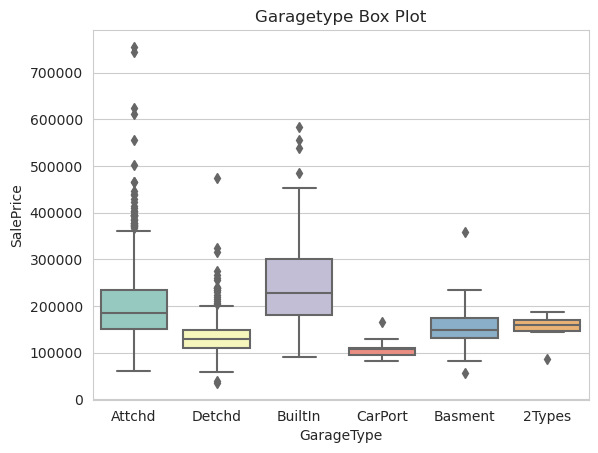

     GarageFinish      Ratio
Unf           605  41.438356
RFn           422  28.904110
Fin           352  24.109589
########################################## 



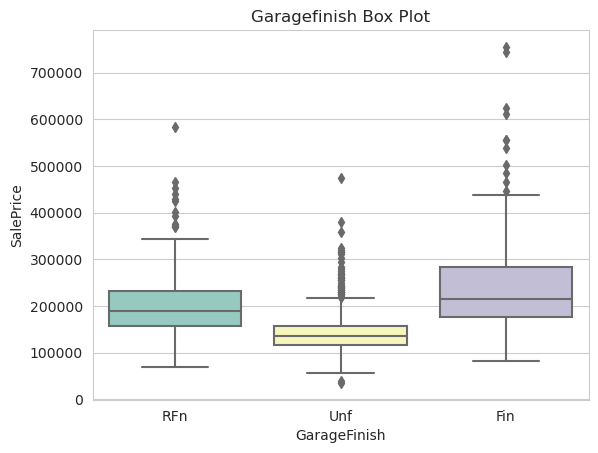

    GarageQual      Ratio
TA        1311  89.794521
Fa          48   3.287671
Gd          14   0.958904
Ex           3   0.205479
Po           3   0.205479
########################################## 



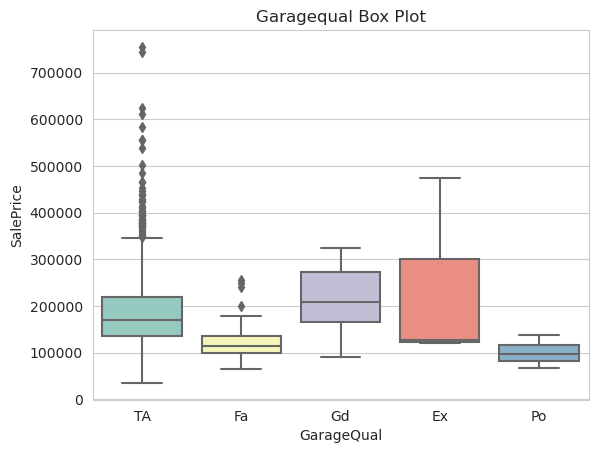

    GarageCond      Ratio
TA        1326  90.821918
Fa          35   2.397260
Gd           9   0.616438
Po           7   0.479452
Ex           2   0.136986
########################################## 



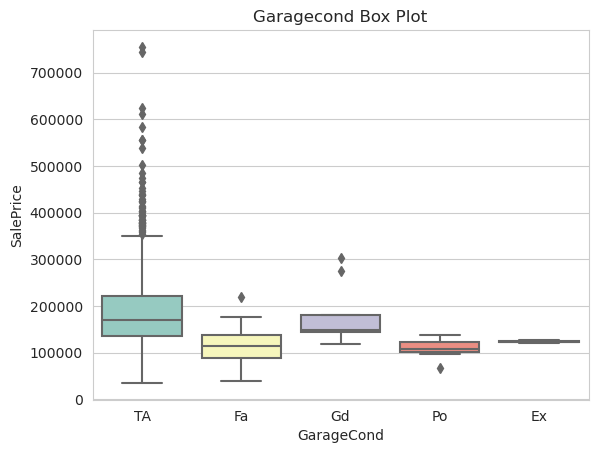

   PavedDrive      Ratio
Y        1340  91.780822
N          90   6.164384
P          30   2.054795
########################################## 



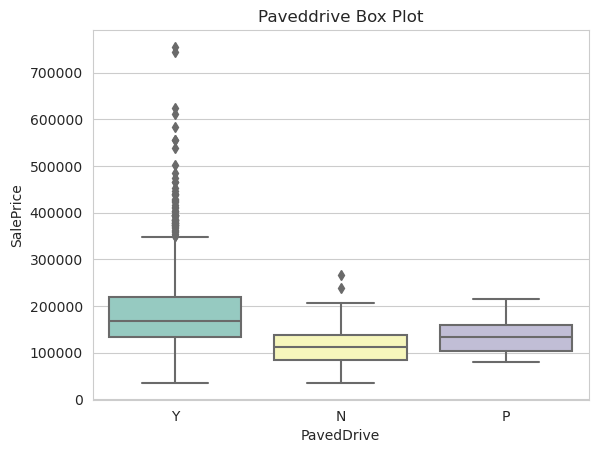

    PoolQC     Ratio
Gd       3  0.205479
Ex       2  0.136986
Fa       2  0.136986
########################################## 



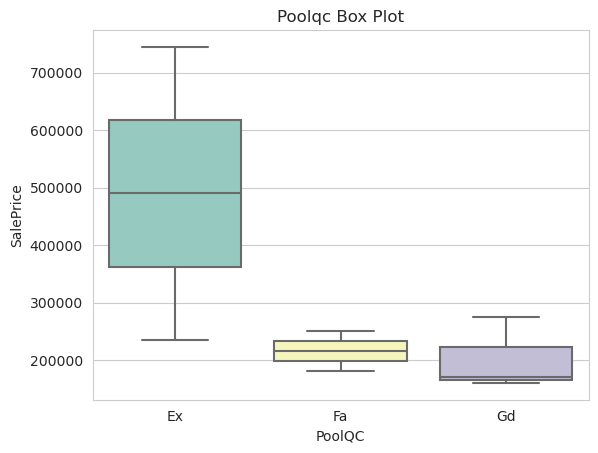

       Fence      Ratio
MnPrv    157  10.753425
GdPrv     59   4.041096
GdWo      54   3.698630
MnWw      11   0.753425
########################################## 



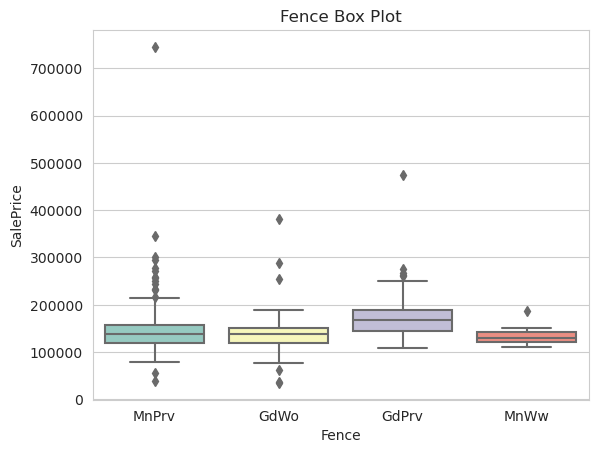

      MiscFeature     Ratio
Shed           49  3.356164
Gar2            2  0.136986
Othr            2  0.136986
TenC            1  0.068493
########################################## 



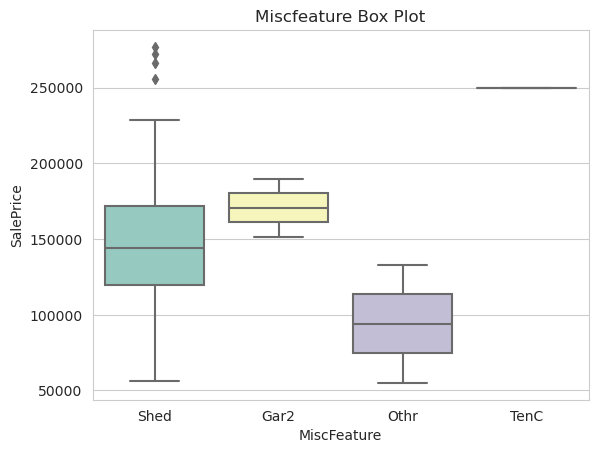

       SaleType      Ratio
WD         1267  86.780822
New         122   8.356164
COD          43   2.945205
ConLD         9   0.616438
ConLI         5   0.342466
ConLw         5   0.342466
CWD           4   0.273973
Oth           3   0.205479
Con           2   0.136986
########################################## 



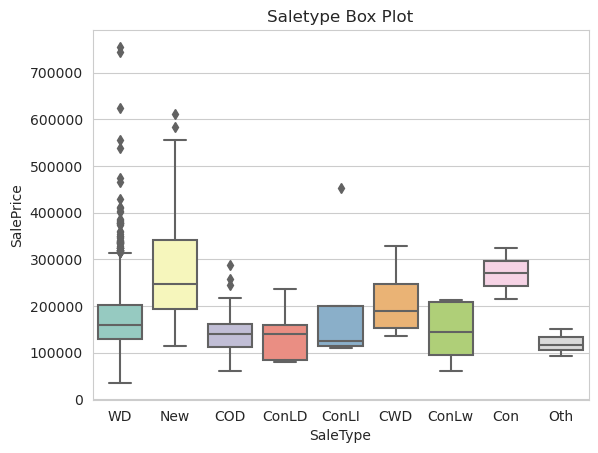

         SaleCondition      Ratio
Normal            1198  82.054795
Partial            125   8.561644
Abnorml            101   6.917808
Family              20   1.369863
Alloca              12   0.821918
AdjLand              4   0.273973
########################################## 



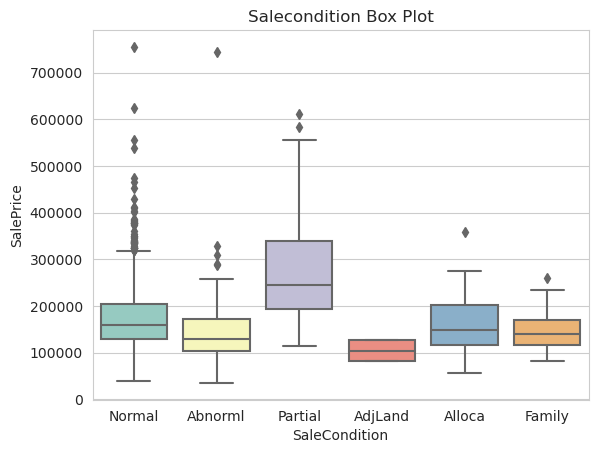

In [12]:
for col in categorical_cols:
    cat_summary(train, col, True)

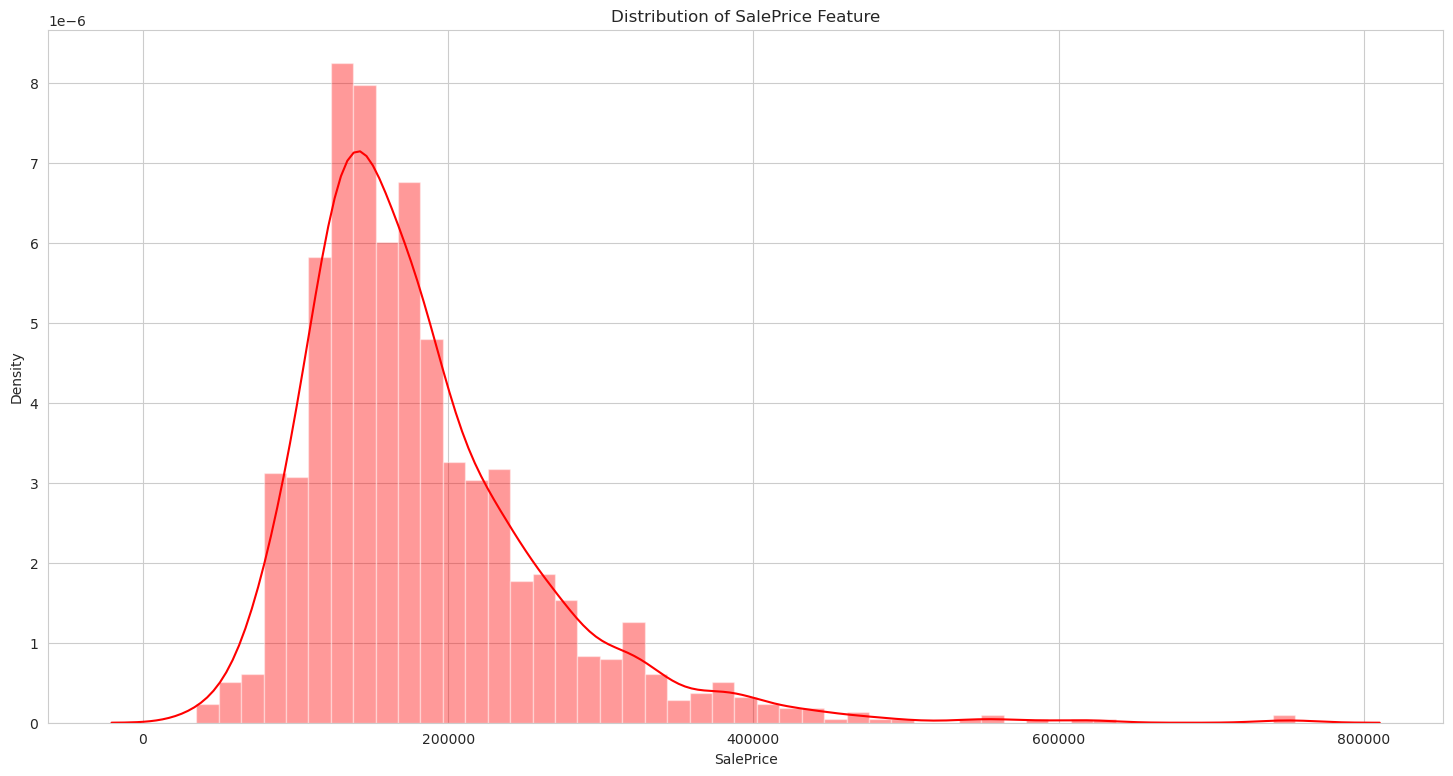

In [13]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="red")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

#### **The distribution of the SalePrice feature seems not like Normal Distribution. To convert the distribution of the SalePrice Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

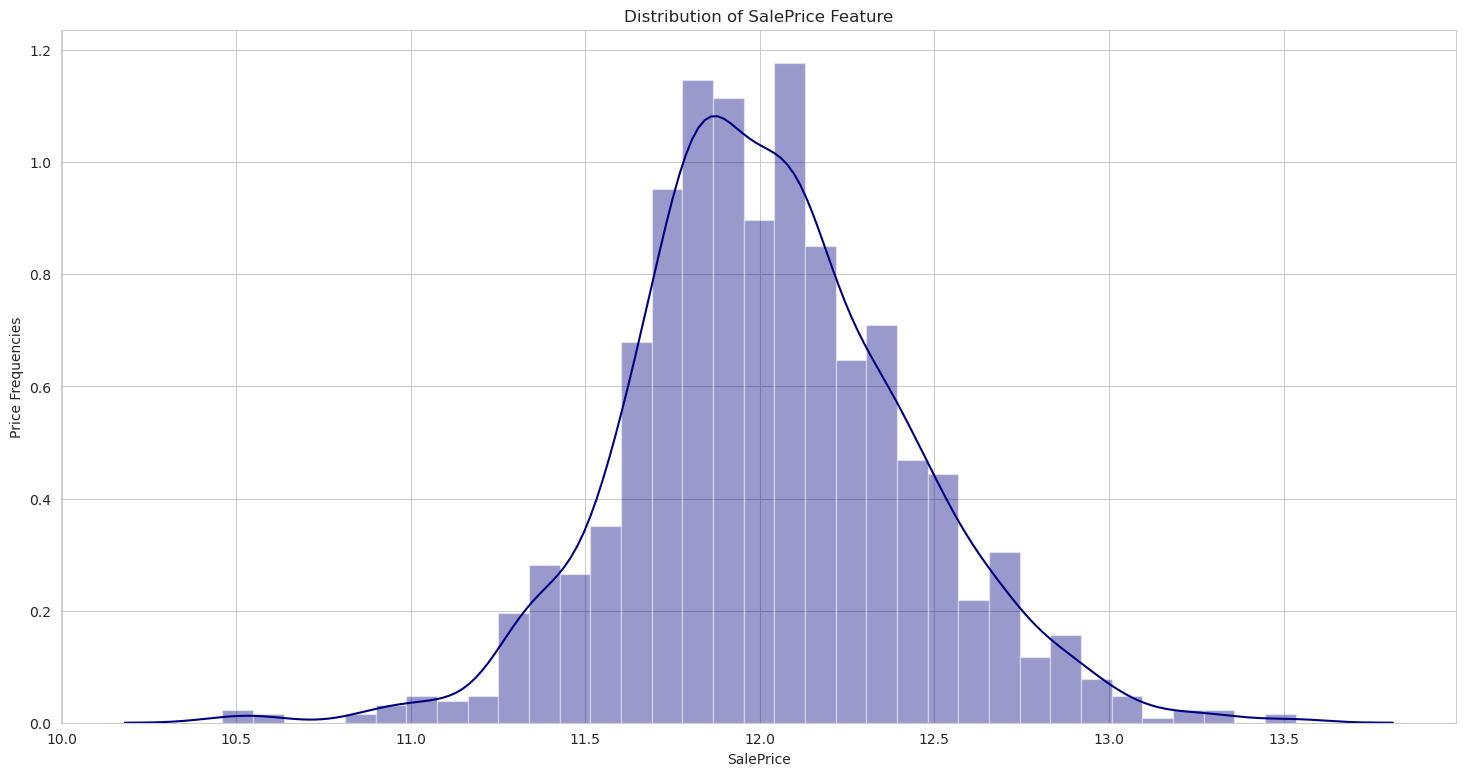

In [14]:
train['SalePrice'] = np.log1p(train['SalePrice'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="navy")
ax.set(ylabel="Price Frequencies")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

#### **Now the distribution of the SalePrice feature is much more fitted for Normal Distribution**

In [15]:
def dist_plt(col):
    f, ax = plt.subplots(figsize=(18,9))
    sns.distplot(train[col], color="red")
    ax.set(xlabel=col)
    ax.set(title="Distribution of " + str(col))
    plt.show()

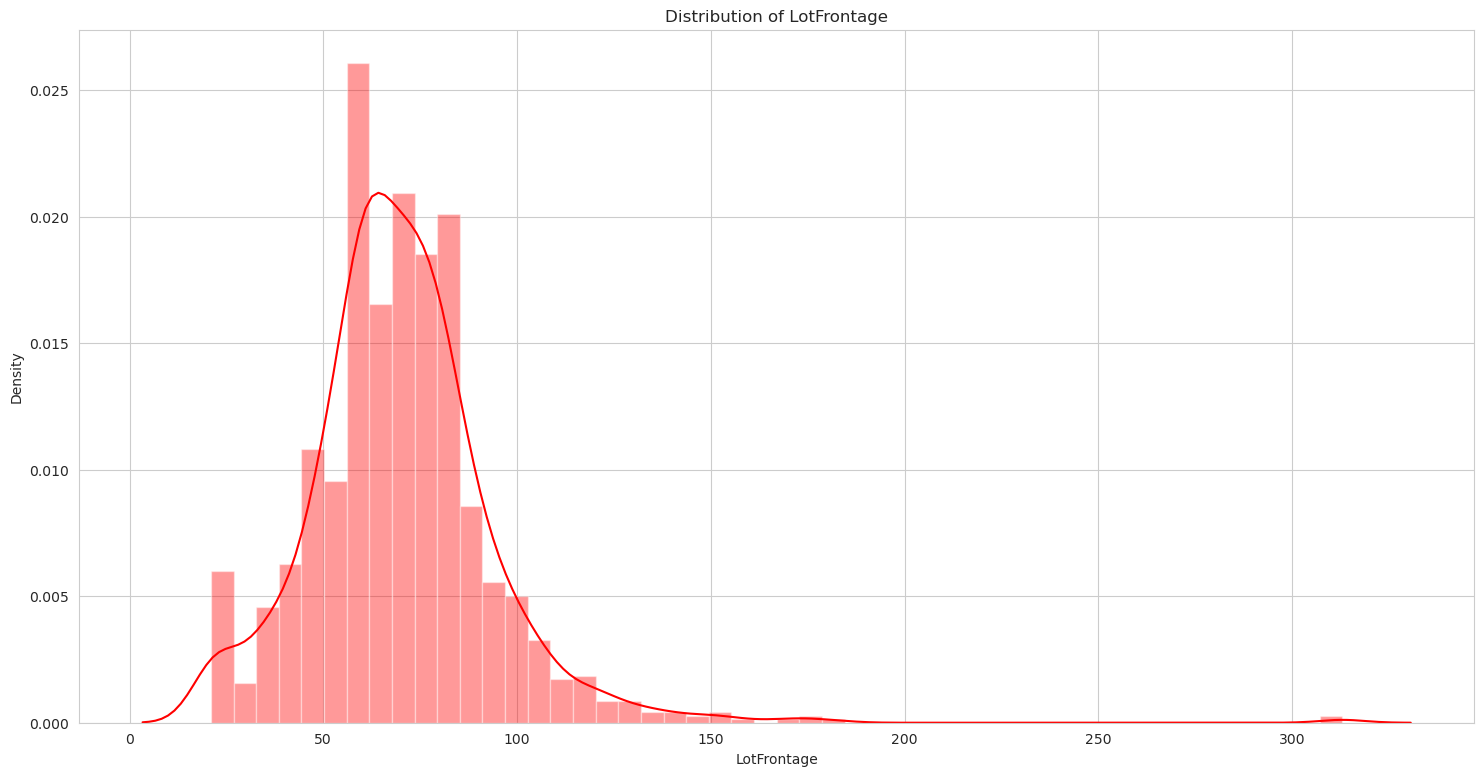

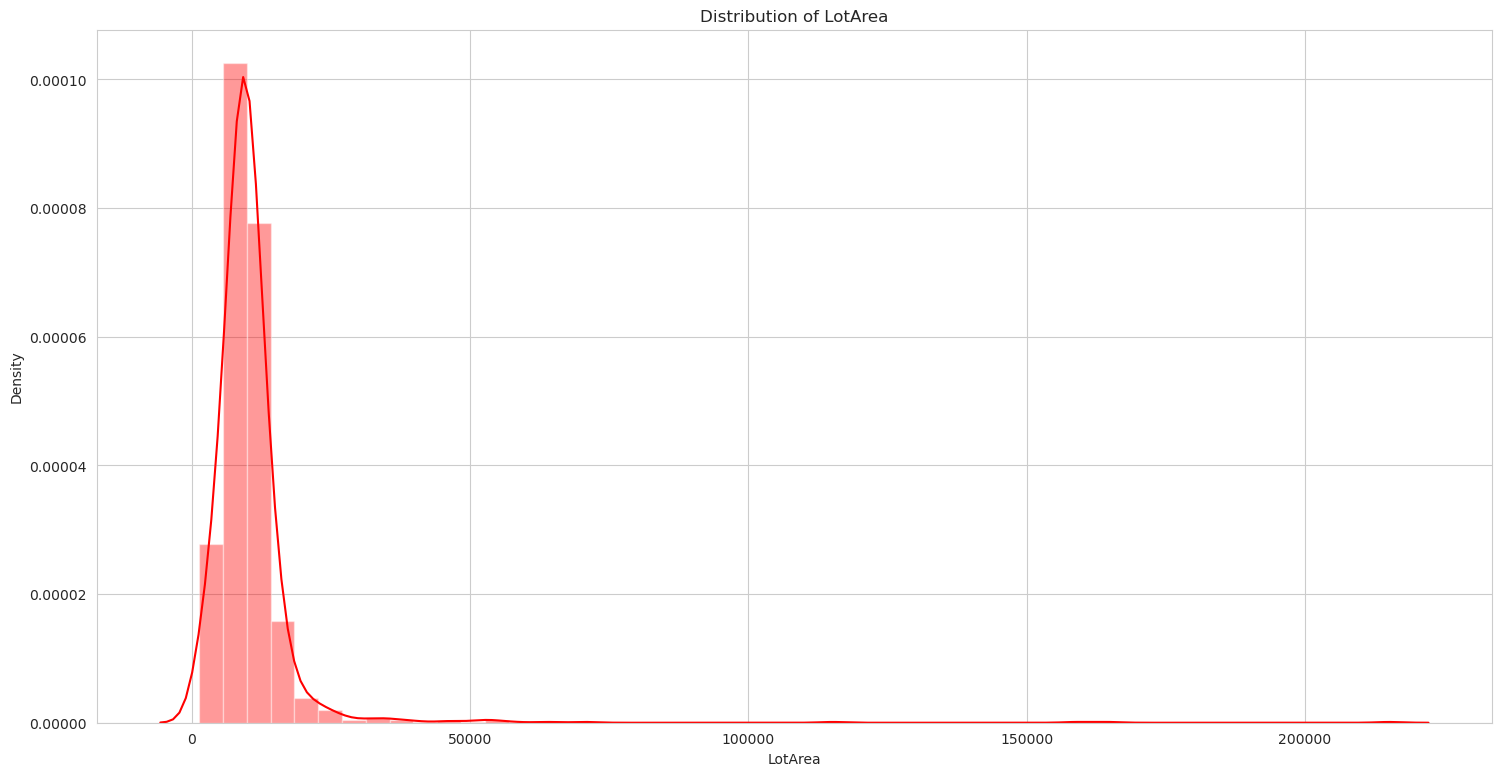

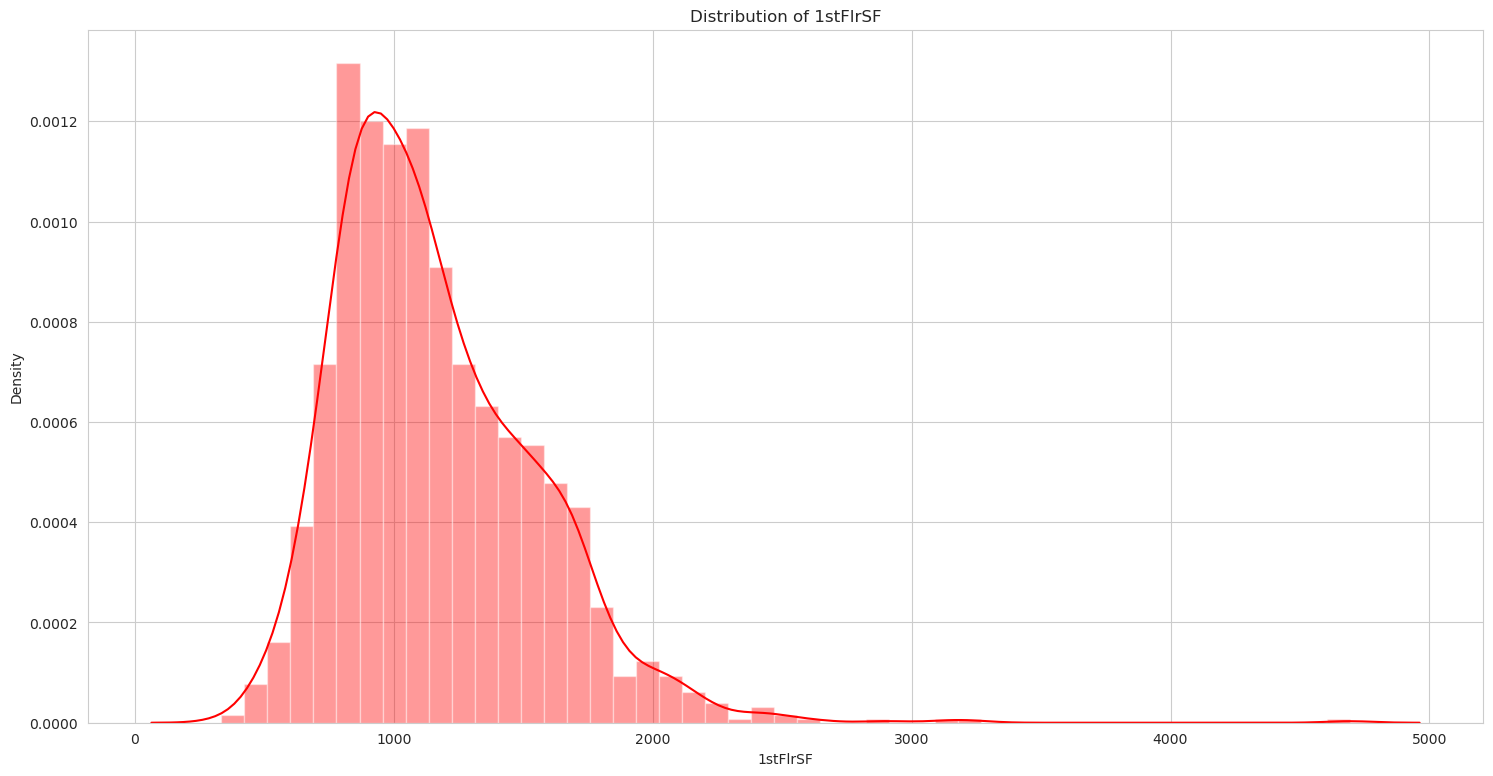

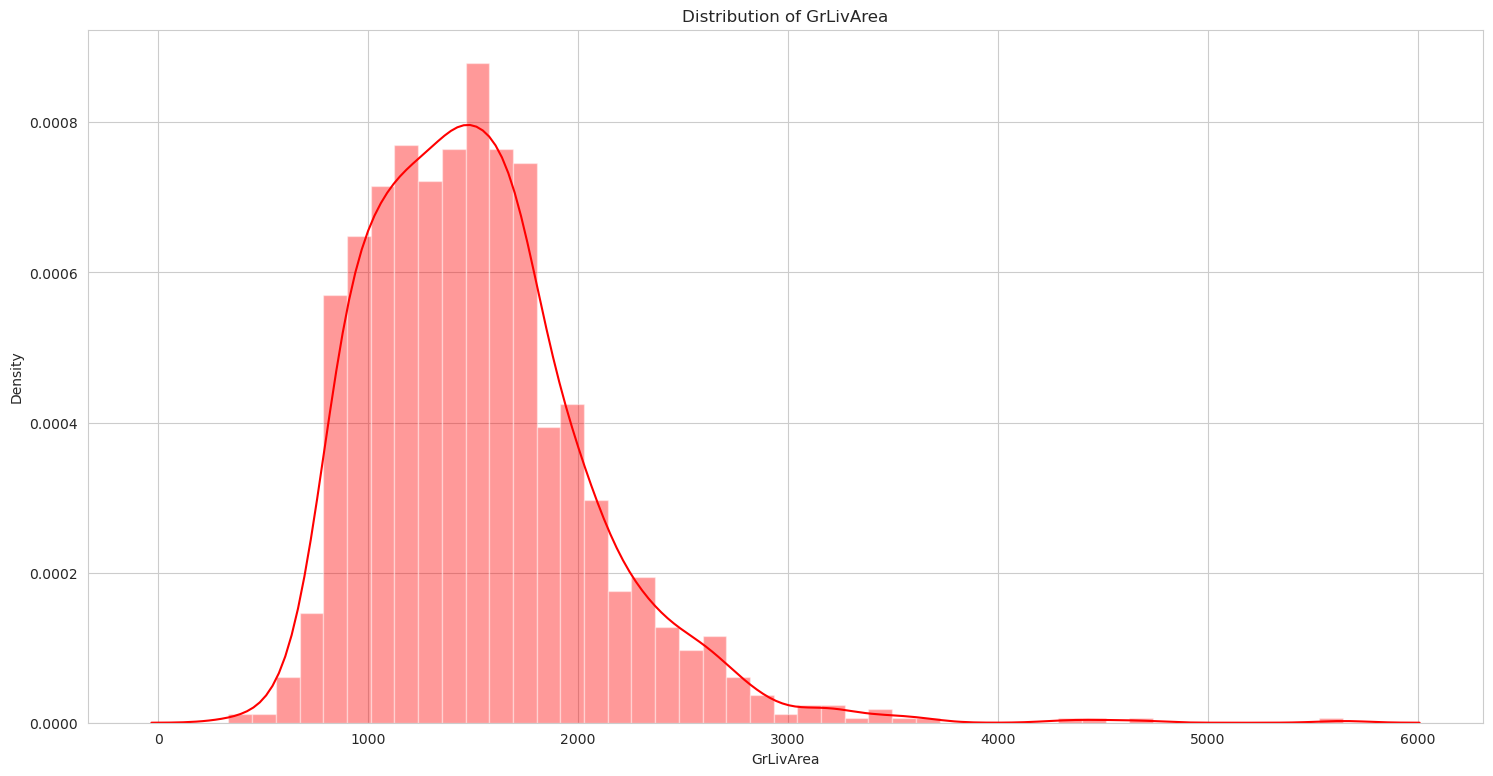

In [16]:
Features=["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea"]
for col in Features:
    dist_plt(col)

#### **The distribution of the LotFrontage, LotArea, 1stFlrSF, GrLivArea features seem not like Normal Distribution. To convert the distribution of the Features to Normal Distribution, np.log1p transformation function in numpy was applied**

In [17]:
def transform_plt(col):
    train[col] = np.log1p(train[col])

    f, ax = plt.subplots(figsize=(18,9))
    sns.distplot(train[col], color="navy")
    ax.set(xlabel=col)
    ax.set(title="Distribution of " + str(col))
    plt.show()

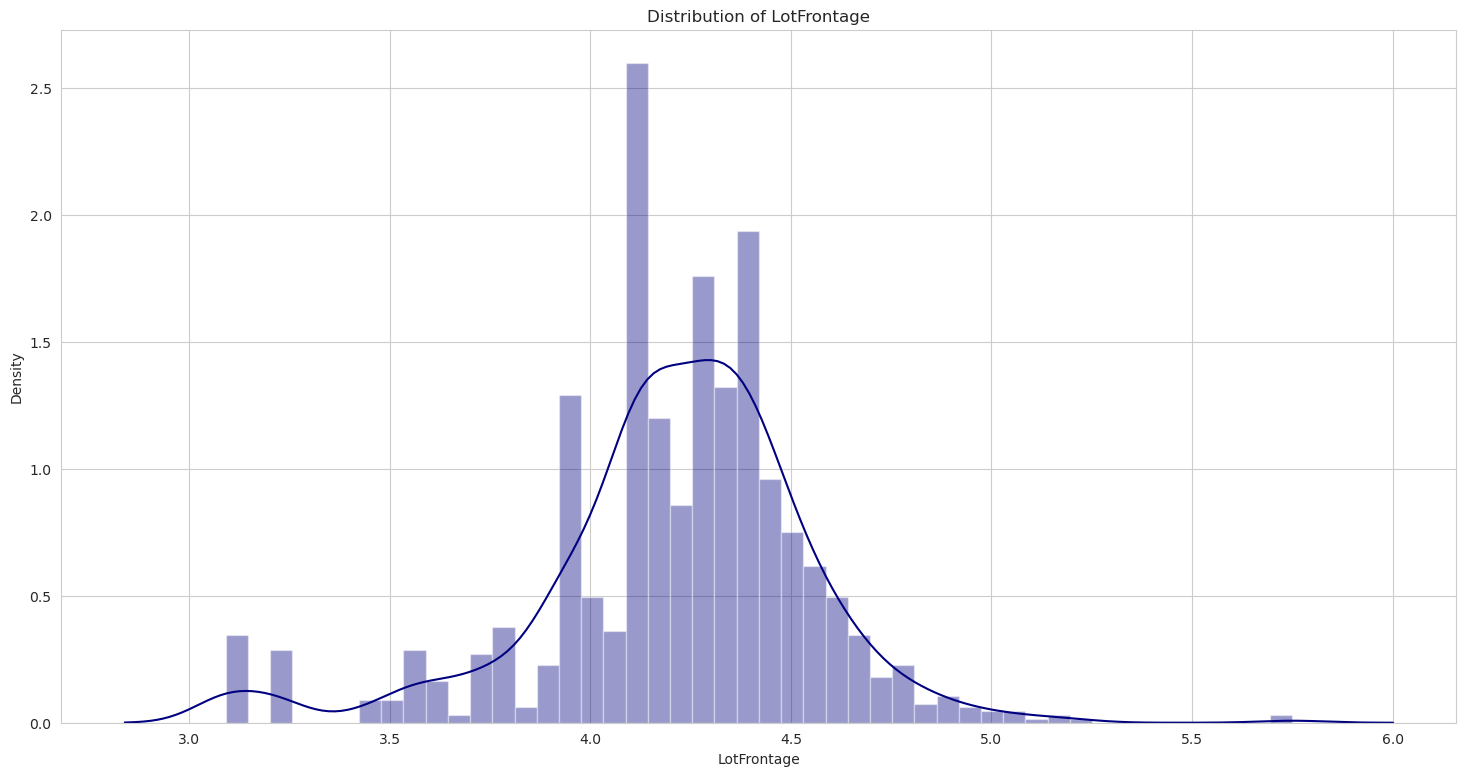

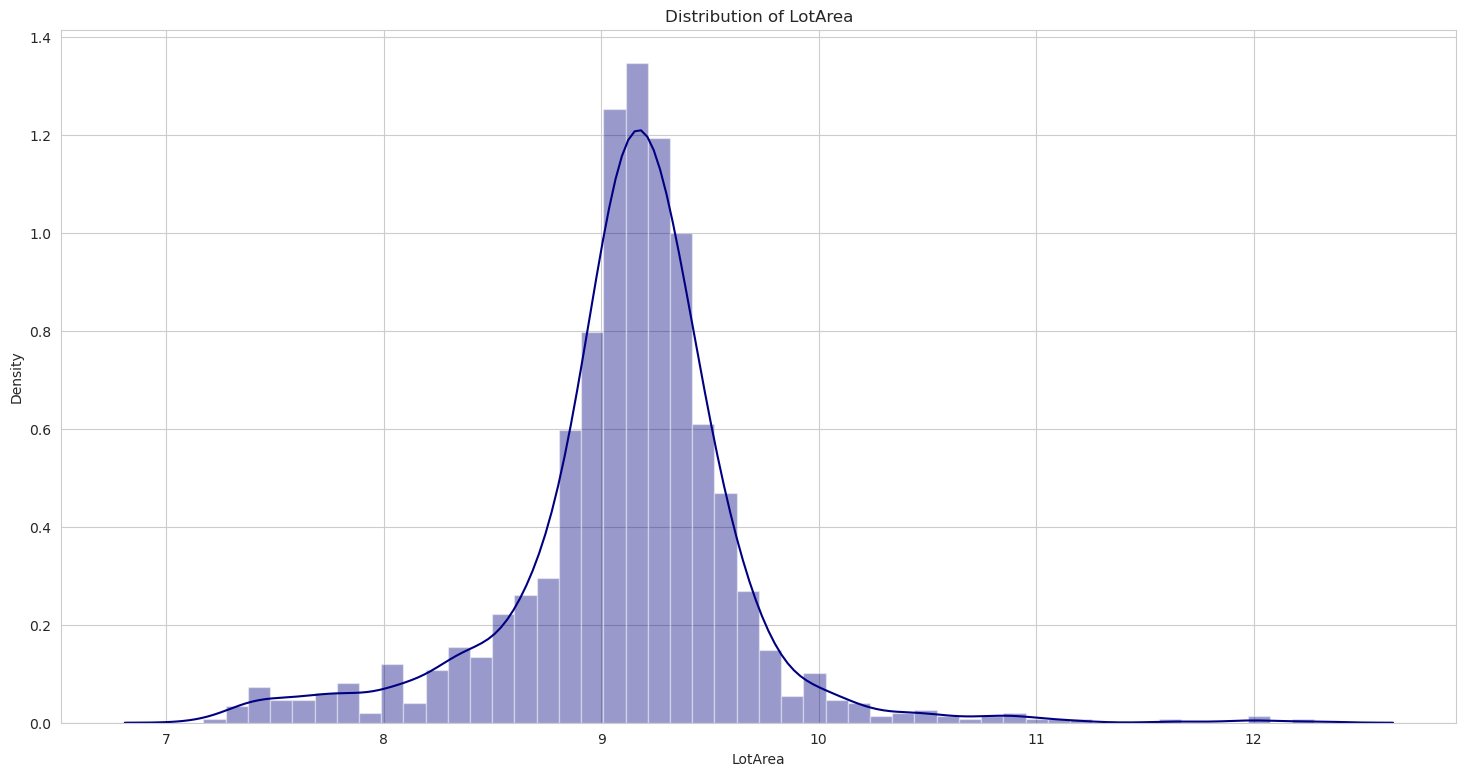

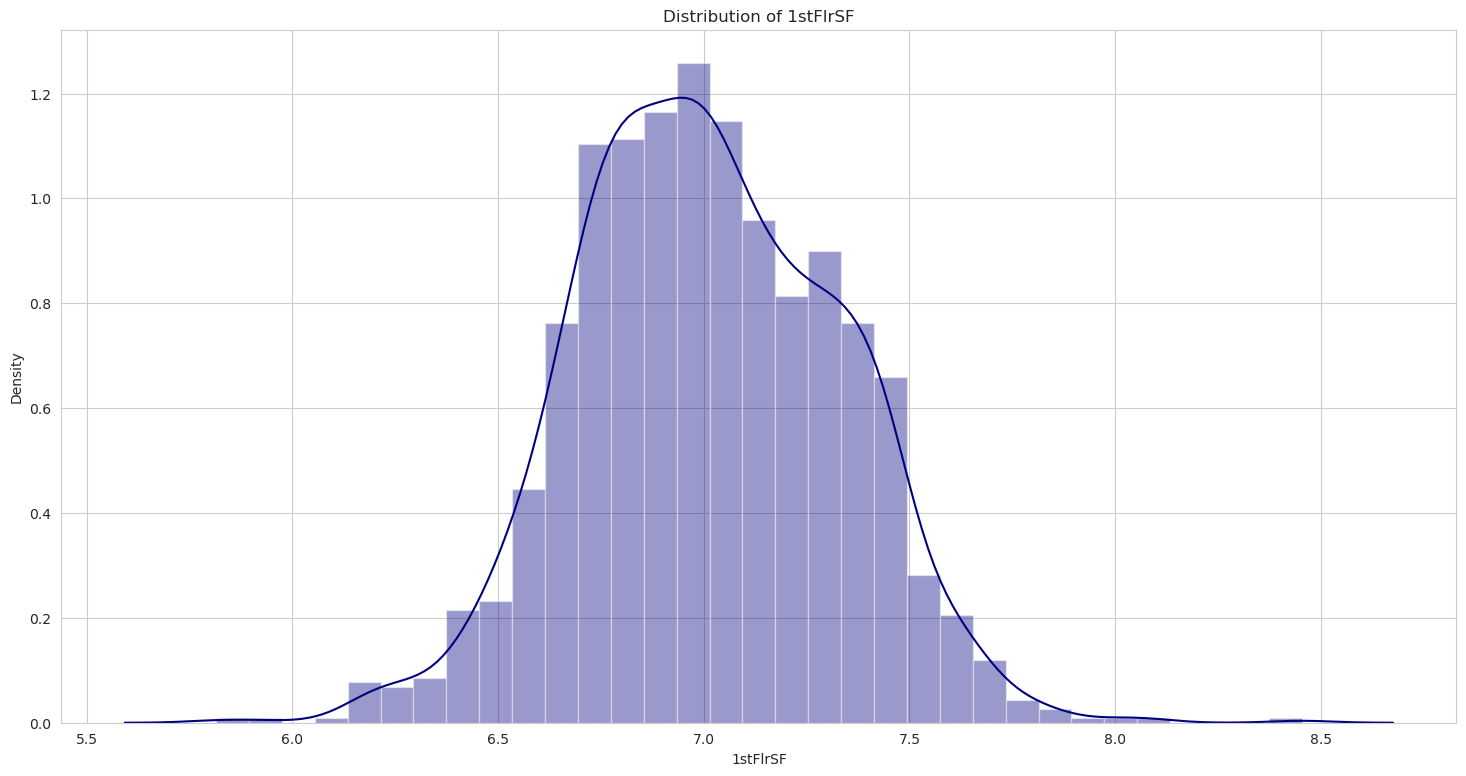

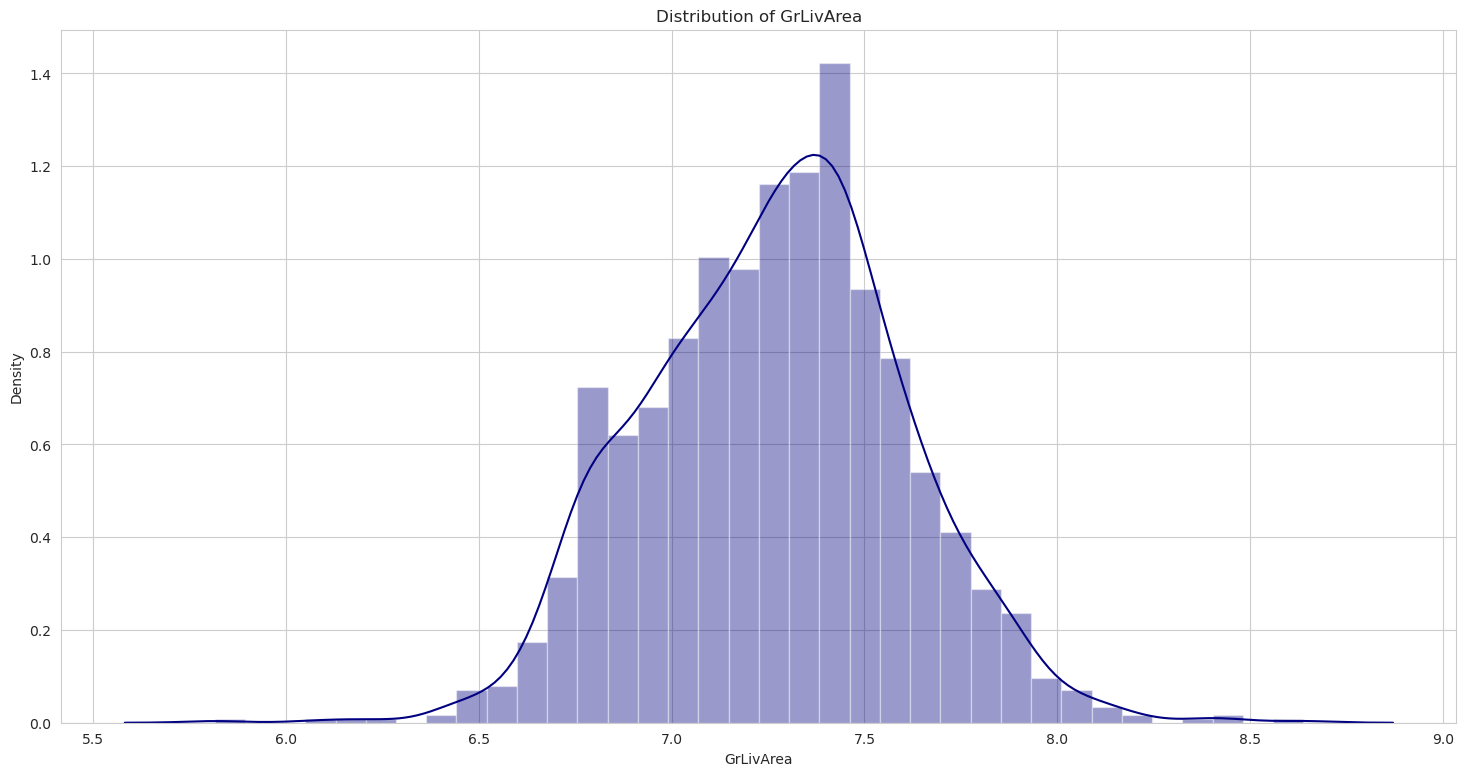

In [18]:
for col in Features:
    transform_plt(col)

#### **Now the distribution of the LotFrontage, LotArea, 1stFlrSF, GrLivArea feature is much more fitted for Normal Distribution**

In [19]:
ntrain = train.shape[0]
ntest = test.shape[0]
y = train.SalePrice.values
df_new = pd.concat((train, test)).reset_index(drop=True)


## HANDLING MISSING VALUES

In [20]:
df_new.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [21]:
def missing_values_table(dataframe, na_name=False):
    # Column Names with Missing Values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of Missing Values of One Column
    number_of_missing_values = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    # Percentage Distribution of Missing Data
    percentage_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    # Dataframe with Missing Data
    missing_df = pd.concat([number_of_missing_values, np.round(percentage_ratio, 2)], axis=1,
                           keys=['number_of_missing_values', 'percentage_ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [22]:
na_columns = missing_values_table(df_new, na_name=True)

              number_of_missing_values  percentage_ratio
PoolQC                            2909             99.66
MiscFeature                       2814             96.40
Alley                             2721             93.22
Fence                             2348             80.44
SalePrice                         1459             49.98
FireplaceQu                       1420             48.65
LotFrontage                        486             16.65
GarageCond                         159              5.45
GarageYrBlt                        159              5.45
GarageFinish                       159              5.45
GarageQual                         159              5.45
GarageType                         157              5.38
BsmtExposure                        82              2.81
BsmtCond                            82              2.81
BsmtQual                            81              2.77
BsmtFinType2                        80              2.74
BsmtFinType1                   

In [23]:
no_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

# Filling the gaps in the columns with the expression "no"
for col in no_cols:
    df_new[col].fillna("No", inplace=True)

missing_values_table(df_new)

              number_of_missing_values  percentage_ratio
SalePrice                         1459             49.98
LotFrontage                        486             16.65
GarageYrBlt                        159              5.45
MasVnrType                          24              0.82
MasVnrArea                          23              0.79
MSZoning                             4              0.14
BsmtFullBath                         2              0.07
BsmtHalfBath                         2              0.07
Functional                           2              0.07
Utilities                            2              0.07
Exterior2nd                          1              0.03
BsmtFinSF1                           1              0.03
BsmtFinSF2                           1              0.03
BsmtUnfSF                            1              0.03
Exterior1st                          1              0.03
Electrical                           1              0.03
KitchenQual                    

In [24]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if
                         data[col].isnull().sum() > 0]  # Variables with missing value are listed

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Number of Missing Values of Variables Before Application

    # Variable object and number of classes if cat_length is equal or below fill the empty values with mode
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x,
                      axis=0)

    # Num_method Mean is the empty values of non -object variables are filled with average
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # Num_method Median is filled with average empty values of non -object variables
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [25]:
df_new = quick_missing_imp(df_new, num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

In [26]:
df_new.drop(['SalePrice'], axis=1, inplace=True)

## FEATURE ENGINEERING

In [27]:
df_new['MSSubClass'] = df_new['MSSubClass'].apply(str)
df_new['OverallCond'] = df_new['OverallCond'].astype(str)
df_new['YrSold'] = df_new['YrSold'].astype(str)
df_new['MoSold'] = df_new['MoSold'].astype(str)

In [28]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

le = LabelEncoder()

for i in cols:
    df_new[i] = le.fit_transform(df_new[[i]])

In [29]:
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index

skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df_new[i] = boxcox1p(df_new[i], lam)


Skew in numerical features: 

There are 58 skewed numerical features to Box Cox transform


In [30]:
df_new = pd.get_dummies(df_new)
print(df_new.shape)
train = df_new[:ntrain]
test = df_new[ntrain:]
print(train.shape)
print(test.shape)

(2919, 222)
(1460, 222)
(1459, 222)


In [31]:
X=train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

## REGRESSION MODELS

In [32]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
# ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ") 

RMSE: 205448263.6172 (LR) 
RMSE: 0.1307 (Ridge) 
RMSE: 0.395 (Lasso) 
RMSE: 0.3715 (ElasticNet) 
RMSE: 0.2547 (KNN) 
RMSE: 0.2023 (CART) 
RMSE: 0.1413 (RF) 
RMSE: 0.1587 (SVR) 
RMSE: 0.1277 (GBM) 
RMSE: 0.1403 (XGBoost) 
RMSE: 0.1297 (LightGBM) 


In [33]:
# Define hyperparameters and their search space
param_grid = {
    'learning_rate': np.linspace(0.08, 0.1, 3),
    'max_depth': [3, 4],
    'n_estimators': [350, 375, 400]
}

# Create Gradient Boosting Regressor object
gbr = GradientBoostingRegressor()

# Create Grid Search object
gbr_grid_search = GridSearchCV(gbr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit Grid Search object to the data
gbr_grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters: ", gbr_grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 375}


In [34]:
gbr = gbr.set_params(**gbr_grid_search.best_params_)
gbr.fit(X_train, y_train)
gbr_train_pred = gbr.predict(X_train)
#gbr_pred = np.expm1(gbr.predict(test.values))
train_rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
gbr_test_pred = gbr.predict(X_test)
test_rmse_gbr = np.sqrt(mean_squared_error(y_test,gbr_test_pred))
print("Train RMSE: ",train_rmse_gbr)
print("Test RMSE: ",test_rmse_gbr)

Train RMSE:  0.04425602653489773
Test RMSE:  0.14832363426445808


In [35]:
# Define hyperparameters and their search space
param_grid = {
    'learning_rate': [0.01, 0.05],
    'max_depth': [7, 8],
    'n_estimators': [350, 400],
    'num_leaves': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5],
    'colsample_bytree': [0.3, 0.4],
}

# Create LGBM Regressor object
lgbm_reg = LGBMRegressor()

# Create Grid Search object
lgbm_grid_search = GridSearchCV(lgbm_reg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit Grid Search object to the data
lgbm_grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters: ",lgbm_grid_search.best_params_)

Best Hyperparameters:  {'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 350, 'num_leaves': 10, 'reg_alpha': 0.1, 'reg_lambda': 0.5}


In [36]:
lgbm = lgbm_reg.set_params(**lgbm_grid_search.best_params_)
lgbm.fit(X_train, y_train)
lgbm_train_pred = lgbm.predict(X_train)
lgbm_pred = np.expm1(lgbm.predict(test.values))
train_rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
lgbm_test_pred = lgbm.predict(X_test)
test_rmse_lgbm = np.sqrt(mean_squared_error(y_test,lgbm_test_pred))
print("Train RMSE: ",train_rmse_lgbm)
print("Test RMSE: ",test_rmse_lgbm)

Train RMSE:  0.0634842617916657
Test RMSE:  0.14487075806014854


In [37]:
Final_model = LGBMRegressor().set_params(**lgbm_grid_search.best_params_).fit(X, y)

In [38]:
submission_df = pd.DataFrame()
submission_df['Id'] = test_ID.astype("Int32")

y_pred_sub = Final_model.predict(test) #test

y_pred_sub = np.expm1(y_pred_sub)

submission_df['SalePrice'] = y_pred_sub

submission_df.to_csv("submission.csv", index=False)

## CONCLUSION

**Based on the modelling with advanced regression algorithms, LightGBM seems to have the minimum RMSE score hold out set which makes it the best for predictions in this dataset.**